# Project Target

This notebook use LLMs to classify the consumer complaints into five different categories: **credit_card, retail_banking, credit_reporting, mortgages_and_loans, and debt_collection.**
   This notebook will focus mostly on using models such as Bag of Words, TF-IDF, Word2Vec, FastText, BERT and implementing machine learning and deep leraning for text classification 

### Text to Numeric Conversion Models:
1. Bag of words
2. Bag of words with n-grams
3. TF-IDF
4. Gensim Word2Vev
5. FastText
6. BERT
7. SpaCy

### Model Selections:
1. Multinomial Naive Bayes
2. Logistic Reression
3. Decision Tree
4. Random Forest
5. GradientBoostingClassifier
6. SVM
7. XGBoost

### Evaluation Metrics:
1. Accuracy
2. Confusion Matrix
3. F1 Score

### Data Preprocessing Steps:
1. Transform everyting to Lowercase
2. Remove Numbers
3. Remove Stop Words
4. Remove Punctuation
5. Lemmatization/Stemming (to normalize text)

## Table of Content


[Inputs](#Inputs)

[Model Training](#ModelTraining)


## Inputs

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import spacy

try:
    nlp = spacy.load("en_core_web_lg")
    print("Model is already installed.")
except OSError:
    !python -m spacy download en_core_web_lg
    nlp = spacy.load("en_core_web_lg")
    print("Model installed and loaded.")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from wordcloud import WordCloud

from typing import Dict
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from time import time 
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


Model is already installed.


In [9]:
df = pd.read_csv(r"C:\Users\INAJ05193\OneDrive - WSP O365\Desktop\Alok\boss\LLMs\Dataset\complaints_processed.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)


,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162421 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [11]:
df.isna().sum()


product       0
narrative    10
dtype: int64

In [12]:
df[df['narrative'].isna()]


,product,narrative
1089,credit_reporting,NaN
3954,credit_reporting,NaN
3955,credit_reporting,NaN
29690,credit_reporting,NaN
139436,debt_collection,NaN
151052,debt_collection,NaN
154494,credit_reporting,NaN
156902,retail_banking,NaN
158538,credit_reporting,NaN
159503,credit_reporting,NaN


In [13]:
df.dropna(axis=0,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [14]:
df[df.duplicated()].head(10)


,product,narrative
32,credit_reporting,name last four s account number writing disput...
44,credit_reporting,open account acct opened balance account acct ...
69,credit_reporting,hello name trying reach several time get probl...
70,credit_reporting,hello name trying reach several time get probl...
112,credit_reporting,name trying make change credit report since sa...
121,credit_reporting,name trying fix incorrect information credit r...
170,credit_reporting,block except otherwise provided section consum...
172,credit_reporting,block except otherwise provided section consum...
173,credit_reporting,block except otherwise provided section consum...
174,credit_reporting,block except otherwise provided section consum...


In [15]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124676 entries, 0 to 124675
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    124676 non-null  object
 1   narrative  124676 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [16]:
df.head(5)


,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [17]:
df['length'] = df['narrative'].apply(lambda x: len(x))
df.sample(5)


,product,narrative,length
56888,credit_card,set credit card bank america payment option am...,532
109754,retail_banking,may concern originally opened account term inc...,1449
111479,credit_reporting,u dept continues update cras information mpn r...,64
51962,credit_reporting,received call student loan company stating deb...,273
33180,mortgages_and_loans,deferral due impact corona virus month startin...,694


In [18]:
short_text_df = df[df['length']<10]


In [19]:
df = df[(~df['length']<10)]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124676 entries, 0 to 124675
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    124676 non-null  object
 1   narrative  124676 non-null  object
 2   length     124676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [20]:

df['product'].value_counts()


product
credit_reporting       56303
debt_collection        21117
mortgages_and_loans    18759
credit_card            15024
retail_banking         13473
Name: count, dtype: int64

In [21]:
df_full = df.copy()
categories = df_full['product'].unique().tolist()
sample_size = 10
random_state = 42

df = pd.DataFrame()

for categories in categories:
    df_1 = df_full[df_full['product']==categories].sample(n = sample_size,random_state = random_state)
    df = pd.concat([df,df_1],axis=0,ignore_index=True)
    

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   product    50 non-null     object
 1   narrative  50 non-null     object
 2   length     50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [23]:
whitespace_re = re.compile(r'\s+')

def text_pre_process(text):
    text = text.lower()
    text = text.strip()
    text = whitespace_re.sub(' ', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_digit]
    return ' '.join(tokens)


In [24]:
df['text_pre_processed'] = df['narrative'].apply(text_pre_process)
df['length_text_pre_processed'] = df['text_pre_processed'].apply(lambda x: len(x))
df.sample(10)


,product,narrative,length,text_pre_processed,length_text_pre_processed
43,debt_collection,pursuant usc requesting validation following a...,75,pursuant usc request validation follow account...,69
25,credit_reporting,credit reporting inaccurate information credit...,307,credit report inaccurate information credit fi...,258
47,debt_collection,disputing information credit report demanding ...,364,dispute information credit report demand item ...,304
16,retail_banking,issue rule bank use relating safety deposit bo...,523,issue rule bank use relate safety deposit box ...,432
34,mortgages_and_loans,complaint lodged company complaint filed thru ...,1674,complaint lodge company complaint file cfpb se...,1425
14,retail_banking,contacted sale sent enough money pay shipping ...,1783,contact sale send money pay shipping sale cash...,1558
45,debt_collection,received phone call back regarding past due de...,667,receive phone past debt time cable rental home...,503
42,debt_collection,debt year old,13,debt year old,13
21,credit_reporting,distressed sent investigation credit bureau li...,419,distressed send investigation credit bureau li...,361
46,debt_collection,hi viewed business profile fraudulent account ...,688,hi view business profile fraudulent account li...,535


In [25]:
df['length_text_pre_processed'].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])


count      50.000000
mean      570.760000
std       713.761481
min        13.000000
5%         73.500000
10%        93.400000
25%       156.000000
50%       308.500000
75%       587.500000
90%      1416.900000
95%      1453.350000
max      4364.000000
Name: length_text_pre_processed, dtype: float64

In [26]:
df['num_word'] = df['text_pre_processed'].apply(lambda x: len(x.split()))

In [27]:
df.head(5)

,product,narrative,length,text_pre_processed,length_text_pre_processed,num_word
0,credit_card,trying day get touch citi card customer suppor...,366,try day touch citi card customer support succe...,313,48
1,credit_card,several occasion tried reach someone costumer ...,533,occasion try reach costumer service today try ...,455,70
2,credit_card,booked vacation canceled tried get reimbursted...,110,book vacation cancel try reimburste air fare d...,94,14
3,credit_card,made payment bank america credit card interest...,273,payment bank america credit card interest char...,230,31
4,credit_card,someone opened u bank credit card name around ...,181,open u bank credit card time contact bank reso...,128,23


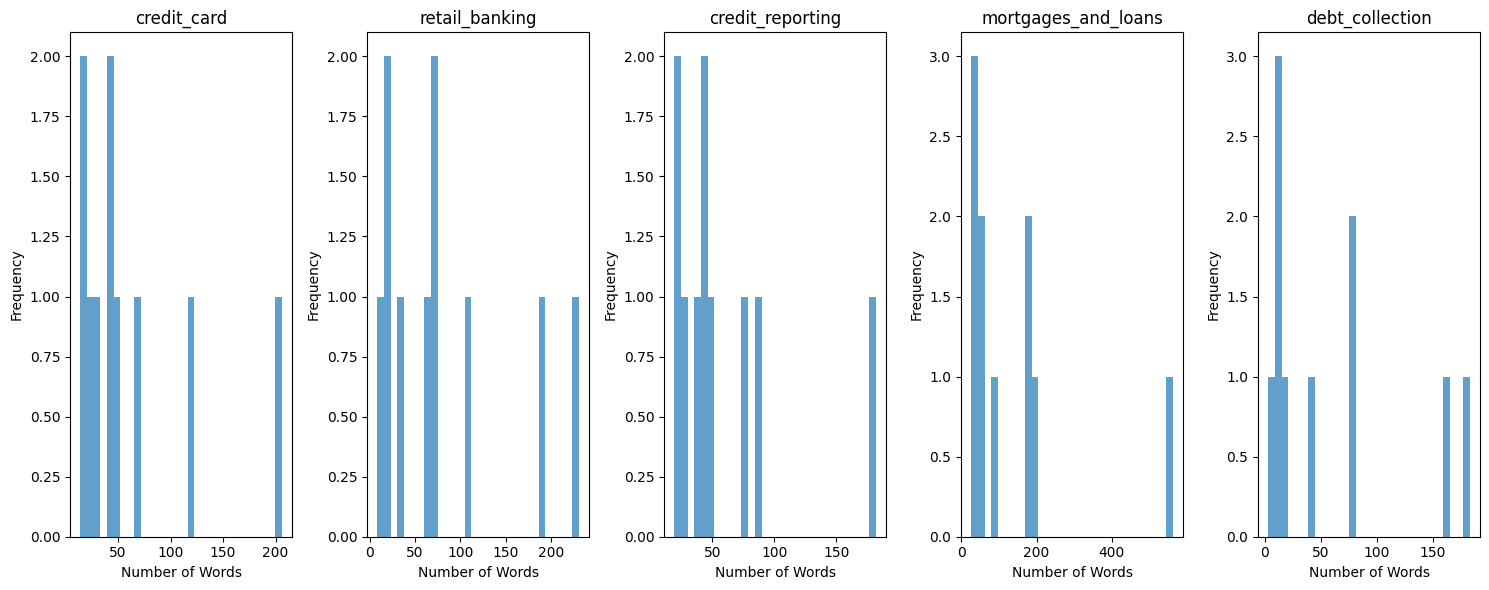

In [28]:
unique_label = df['product'].unique()
num_label = len(unique_label)
fig , axes = plt.subplots(nrows = 1, ncols = num_label, figsize = (15,6))

for i, label in enumerate(unique_label):
    axes[i].hist(
    df.loc[df['product']==label,'num_word'],
    bins = 30,
    alpha=0.7)
    axes[i].set_title(label)
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()


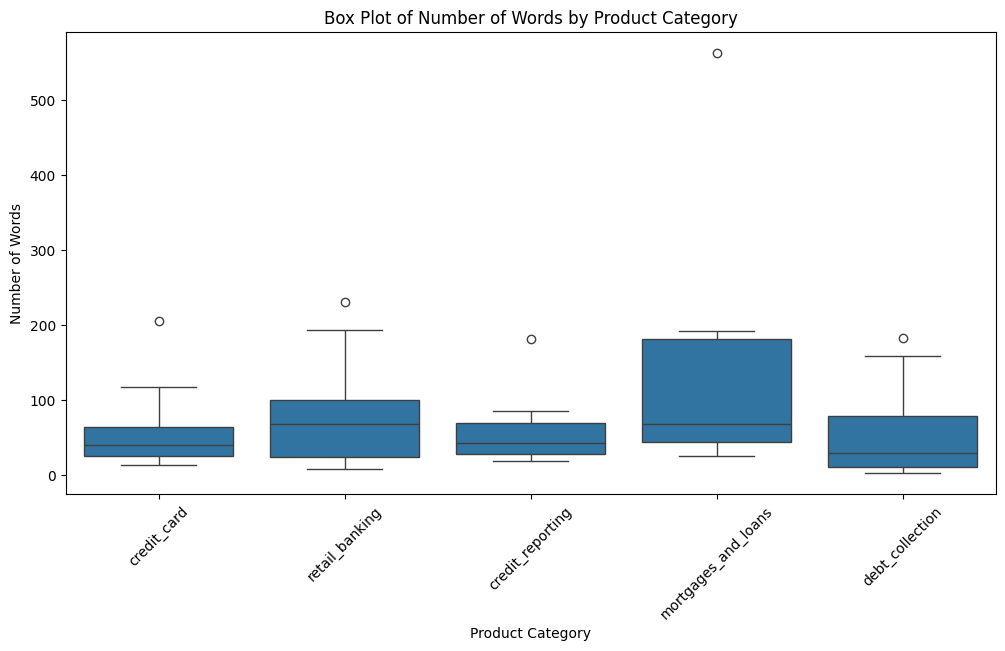

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='product',y='num_word',data=df)
plt.xlabel('Product Category')
plt.ylabel('Number of Words')
plt.title('Box Plot of Number of Words by Product Category')
plt.xticks(rotation=45)
plt.show()


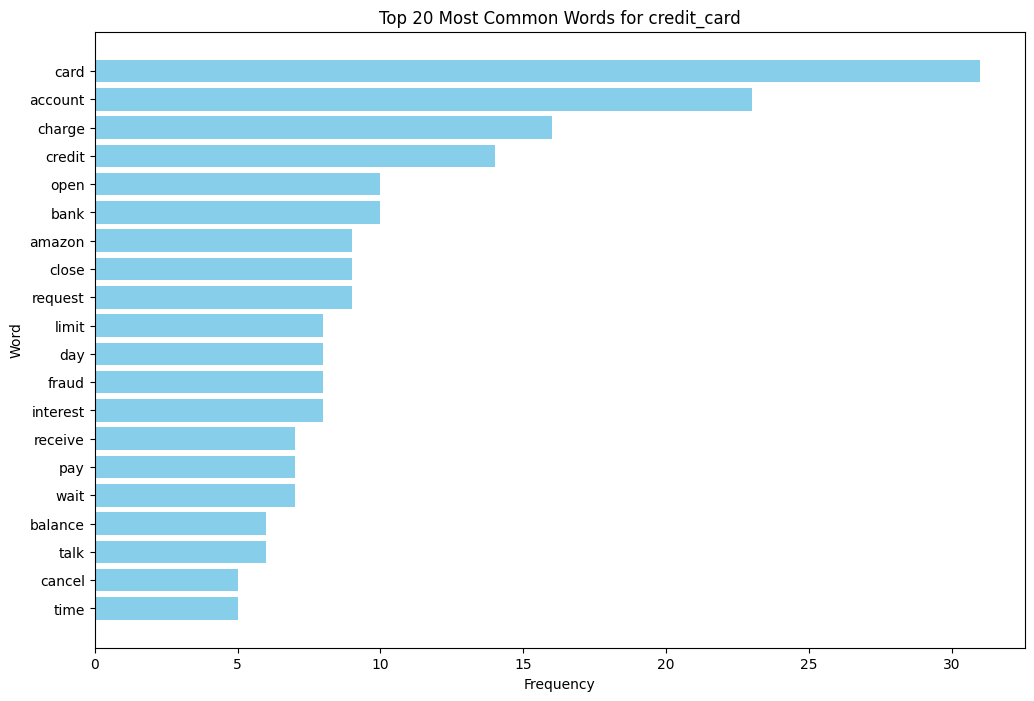

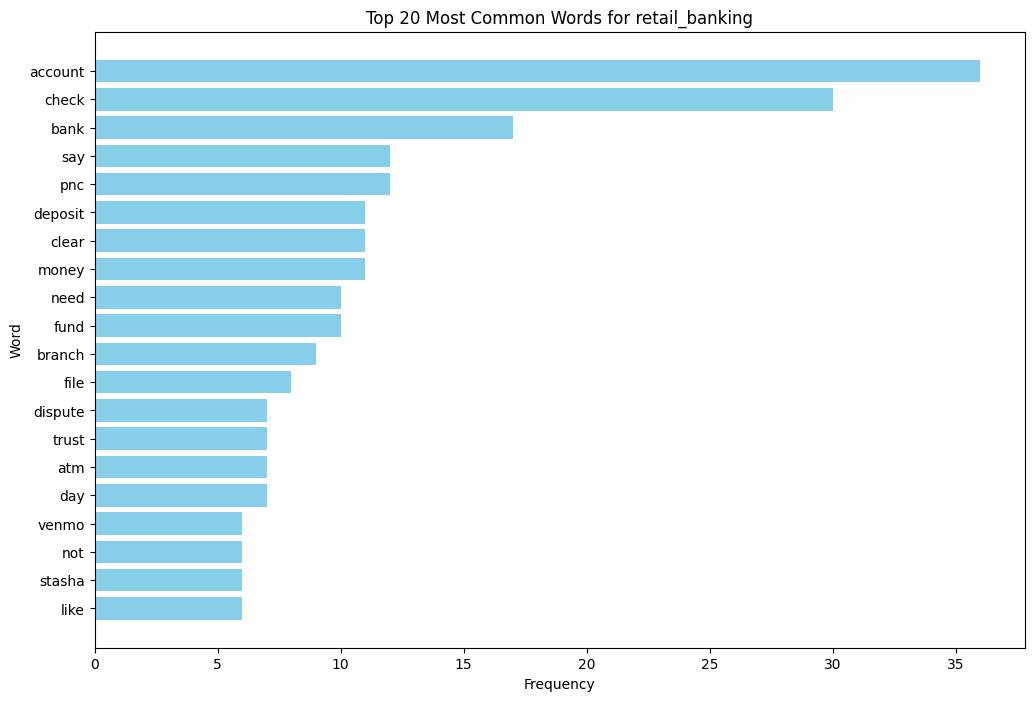

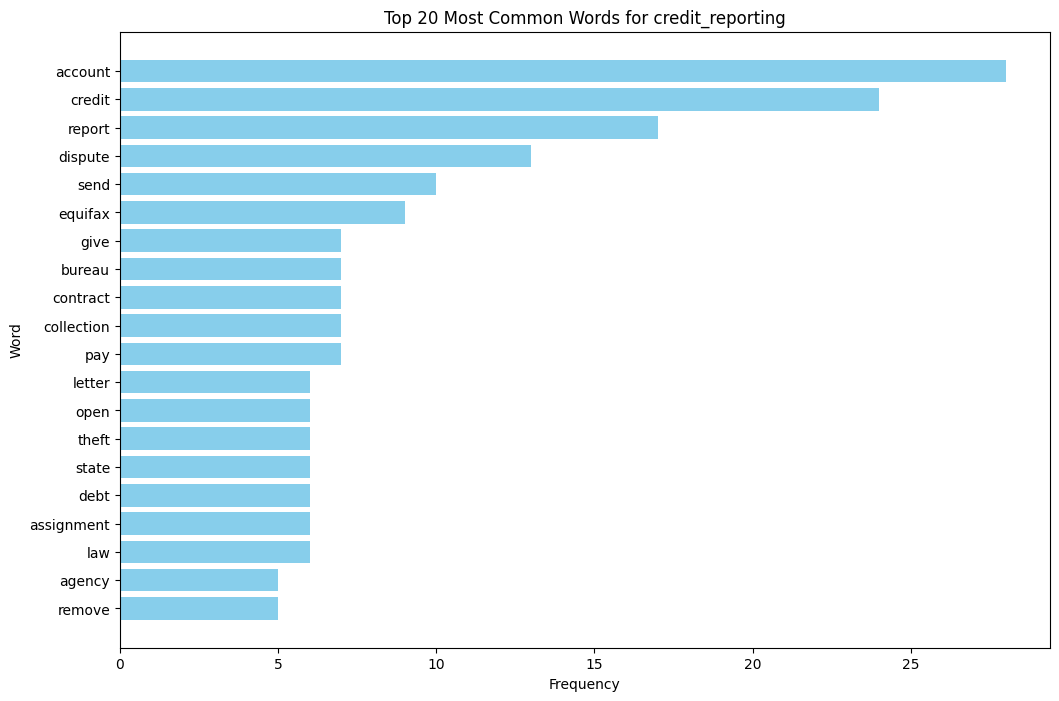

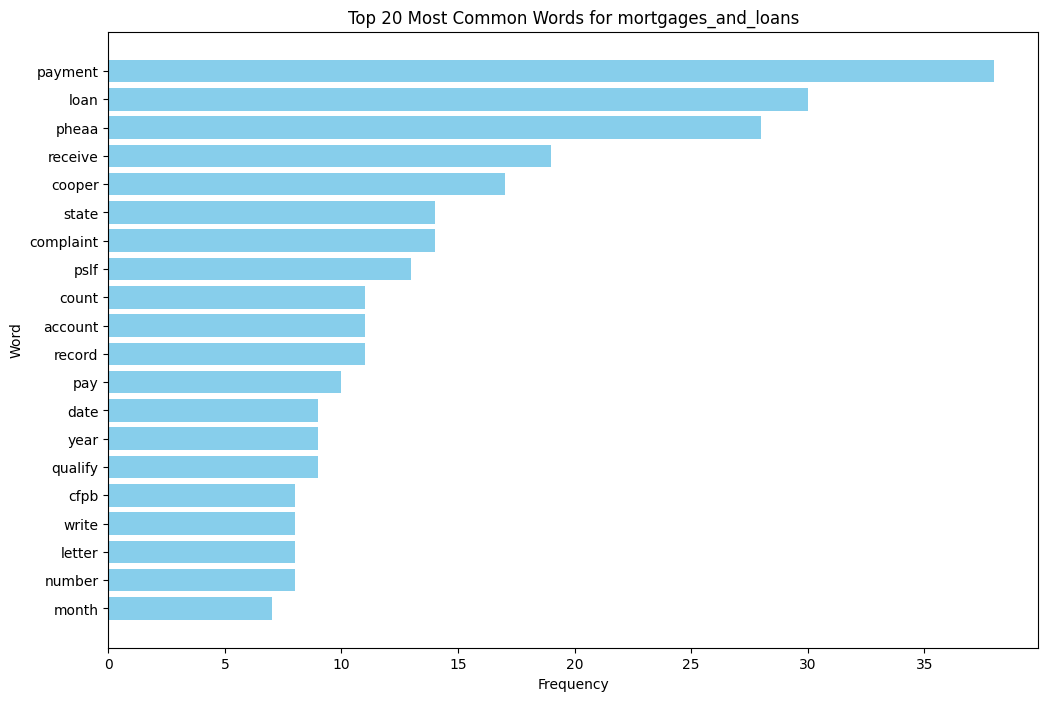

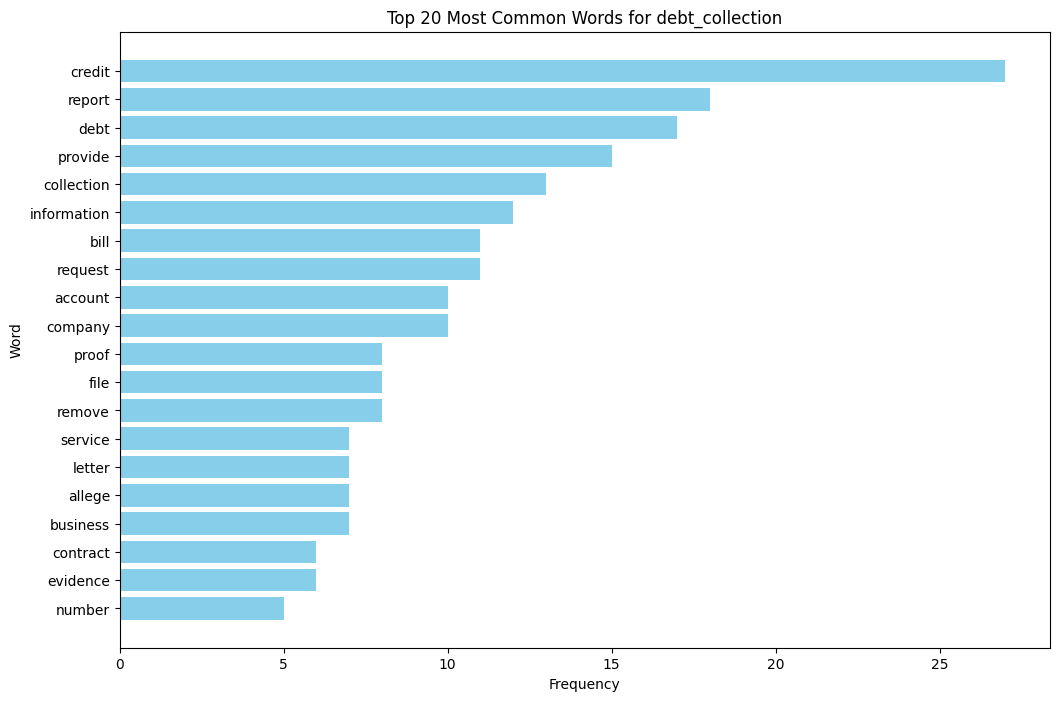

In [30]:
from collections import Counter

def plot_top_20_words_in_category(category,df):
    
    category_text = df.loc[df['product']==category,'text_pre_processed']
    
    combine_text = " ".join(category_text)
    
    words = combine_text.split()
    
    word_freq = Counter(words)
    
    word_freq_df = pd.DataFrame(word_freq.items(),columns=['word','frequency'])
    
    word_freq_df = word_freq_df.sort_values(by='frequency',ascending=False)
    
    N=20
    
    top_20_words = word_freq_df.head(N)
    
    plt.figure(figsize=(12,8))
    plt.barh(top_20_words['word'],top_20_words['frequency'],color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(f'Top {N} Most Common Words for {category}')
    plt.gca().invert_yaxis()  
    plt.show()
    
unique_category = df['product'].unique()

for category in unique_category:
    plot_top_20_words_in_category(category,df)



In [31]:
le = LabelEncoder()

df['target'] = le.fit_transform(df['product'])

df.head(5)

,product,narrative,length,text_pre_processed,length_text_pre_processed,num_word,target
0,credit_card,trying day get touch citi card customer suppor...,366,try day touch citi card customer support succe...,313,48,0
1,credit_card,several occasion tried reach someone costumer ...,533,occasion try reach costumer service today try ...,455,70,0
2,credit_card,booked vacation canceled tried get reimbursted...,110,book vacation cancel try reimburste air fare d...,94,14,0
3,credit_card,made payment bank america credit card interest...,273,payment bank america credit card interest char...,230,31,0
4,credit_card,someone opened u bank credit card name around ...,181,open u bank credit card time contact bank reso...,128,23,0


In [32]:
label_mapping = dict(zip(le.classes_,le.transform(le.classes_)))

for product,target in label_mapping.items():
    print('Product',{product},'Target',{target})

Product {'credit_card'} Target {0}
Product {'credit_reporting'} Target {1}
Product {'debt_collection'} Target {2}
Product {'mortgages_and_loans'} Target {3}
Product {'retail_banking'} Target {4}


In [33]:
X = df['text_pre_processed']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)


### Bag of Words Representation with n-grams = (1, 1)
In this step, the Bag of Words (BoW) model is applied with unigrams (n-grams = 1). The text data is converted into a numeric representation using CountVectorizer, which creates a **sparse matrix** where each column represents a unique word from the vocabulary, and each row corresponds to a document. The values represent the frequency of word occurrences within each document.

After applying CountVectorizer, the resulting matrices are scaled using MinMaxScaler. This scaling ensures that all feature values are within a fixed range, which is important for many machine learning models. Specifically, the features are scaled between 0 and 1.

Steps involved:

**Convert text to numeric:** CountVectorizer is used to transform the training and testing text data into numeric features.

**Scale features:** The transformed Bag of Words features are scaled to a range of [0, 1] using MinMaxScaler.

In [34]:
vectorizer = CountVectorizer()

scaler = MinMaxScaler()

X_train_count_vec = vectorizer.fit_transform(X_train)

X_test_count_vec = vectorizer.transform(X_test)

X_train_count_vec_scaled = scaler.fit_transform(X_train_count_vec.toarray())

X_test_count_vec_scaled = scaler.transform(X_test_count_vec.toarray())

print("Training data scaled",X_train_count_vec_scaled.shape)
print("Test data scaled",X_test_count_vec_scaled.shape)


Training data scaled (40, 1109)
Test data scaled (10, 1109)


### Bag of Words Representation with n-grams = (1, 3)
In this step, the Bag of Words (BoW) model is applied with n-grams ranging from 1 to 3. This means that the text data is converted into numeric features where each feature represents either a single word, a bigram (two consecutive words), or a trigram (three consecutive words).

The CountVectorizer is used to create these features, and MinMaxScaler is then applied to scale these features to a range between 0 and 1.

Steps involved:

Convert text to numeric with n-grams: CountVectorizer with ngram_range=(1, 3) is used to capture unigrams, bigrams, and trigrams.
Scale features: The resulting feature matrices are scaled using MinMaxScaler.

In [35]:
vectorizer_n_grams = CountVectorizer(ngram_range=(1,3), max_features = 5000)

scaler_ngram = MinMaxScaler()

X_train_count_vec_n_gram = vectorizer_n_grams.fit_transform(X_train)

X_test_count_vec_n_gram = vectorizer_n_grams.transform(X_test)

X_train_count_vec_n_gram_scaled = scaler_ngram.fit_transform(X_train_count_vec_n_gram.toarray())

X_test_count_vec_n_gram_scaled = scaler_ngram.fit_transform(X_test_count_vec_n_gram.toarray())

print("Training data scaled",X_train_count_vec_n_gram_scaled.shape)
print("Test data scaled",X_test_count_vec_n_gram_scaled.shape)


Training data scaled (40, 5000)
Test data scaled (10, 5000)


### TF-IDF Vectorization
TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation of text data that reflects the importance of words in a document relative to the entire corpus **Sparse Vector**. It adjusts for the frequency of words across all documents, highlighting terms that are important to specific documents while diminishing the weight of frequently occurring terms that are less informative.

Steps in TF-IDF Vectorization:

**TF-IDF Vectorization:** Converts text data into a matrix of TF-IDF features. Each feature represents the importance of a word in a document, considering both its frequency in the document and its inverse frequency across the corpus.

**Scaling:** The resulting TF-IDF matrix is scaled to normalize the feature values. This ensures that all features contribute equally to the model training.

In [36]:
vectorizer_tfidf = TfidfVectorizer(max_features = 5000)

sacler_tfidf = MinMaxScaler()

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

X_test_tfidf = vectorizer_tfidf.transform(X_test)

X_train_tfidf_scaled = sacler_tfidf.fit_transform(X_train_tfidf.toarray())

X_test_tfidf_scaled = sacler_tfidf.transform(X_test_tfidf.toarray())

print("Scaled Train Data",X_train_tfidf_scaled.shape)
print("Scaled Test Data",X_test_tfidf_scaled.shape)


Scaled Train Data (40, 1109)
Scaled Test Data (10, 1109)


### SpaCy Word2Vec
SpaCy's Word2Vec model provides word embeddings, which are **dense vector** representations of words that capture their semantic meaning. SpaCy's pre-trained word embeddings can be used to convert text data into numerical format, where each document is represented by the average of word vectors for the words in the document.

Steps for using SpaCy Word2Vec:

**Out-of-Vocabulary (OOV) Check:** Verify how many words in the dataset are out-of-vocabulary (i.e., words not present in the SpaCy model's vocabulary).

**Word2Vec Vectorization:** Convert each document into a vector representation by averaging the word vectors of the words in the document.

**Scaling:** Normalize the feature values of the vector representations to a range between 0 and 1.

In [37]:
df_oov_check = X_train.to_frame(name='text')

df_oov_check['num_of_words'] = df_oov_check['text'].apply(lambda x: len([token for token in nlp(x)]))

df_oov_check['num_of_oov_words'] = df_oov_check['text'].apply(lambda x: len([1 for token in nlp(x) if token.is_oov]))

df_oov_check.sample(5)


,text,num_of_words,num_of_oov_words
21,distressed send investigation credit bureau li...,46,0
42,debt year old,3,0
15,error describe change able link bank account a...,8,0
32,complete refinance primary residence cooper ol...,172,0
34,complaint lodge company complaint file cfpb se...,192,8


In [38]:
df_oov_check['num_of_oov_words'].value_counts()

num_of_oov_words
0     24
1      9
2      3
8      1
7      1
6      1
55     1
Name: count, dtype: int64

In [39]:
X_train_word2vec = X_train.apply(lambda x: nlp(x).vector)
X_test_word2vec = X_test.apply(lambda x: nlp(x).vector)

X_train_word2vec = np.stack(X_train_word2vec)
X_test_word2vec = np.stack(X_test_word2vec)

scaler_word2vec = MinMaxScaler()

X_train_word2vec_scaled = scaler_word2vec.fit_transform(X_train_word2vec)
X_test_word2vec_scaled = scaler_word2vec.transform(X_test_word2vec)

print('Train scaled data',X_train_word2vec_scaled.shape)
print('Test scaled data',X_test_word2vec_scaled.shape)

Train scaled data (40, 300)
Test scaled data (10, 300)


### Gensim Word2Vec
Gensim's Word2Vec is a popular model for generating word embeddings. It uses the Word2Vec algorithm to convert words into **dense vector** representations based on their context in a corpus. Unlike SpaCy's pre-trained embeddings, Gensim allows for the training of custom embeddings on specific datasets.

Key Features:

**Training Custom Embeddings:** Train embeddings on your own corpus to capture domain-specific nuances.

**Word Similarity:** Provides functionality to find similarities between words using the trained embeddings.

**Vector Representations:** Converts words into continuous vector spaces, capturing semantic meanings.

The following code demonstrates how to use Gensim's Word2Vec to transform text data into numerical features.

In [40]:
import gensim.downloader as api

print('Available Models')
print(list(api.info()['models'].keys()))

gensim_glove_wv = api.load("glove-wiki-gigaword-100")

print('Loaded')

Available Models
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
Loaded


In [41]:
def pre_process_text_gensim(text):
    token = text.split()
    
    vector = [gensim_glove_wv[word] for word in token if word in gensim_glove_wv]
    
    if vector:
        return np.mean(vector,axis=0)
    else:
        return np.zeros(300)
    

In [42]:
X_train_gensim = X_train.apply(pre_process_text_gensim)
X_test_gensim = X_test.apply(pre_process_text_gensim)

X_train_gensim = np.stack(X_train_gensim)
X_test_gensim = np.stack(X_test_gensim)

scaler_gensim = MinMaxScaler()

X_train_gensim_scaled = scaler_gensim.fit_transform(X_train_gensim)
X_test_gensim_scaled = scaler_gensim.fit_transform(X_test_gensim)

print("After Scaling:")
print("Scaled training data (Word2Vec Gensim) shape:", X_train_gensim_scaled.shape)
print("Scaled test data (Word2Vec Gensim) shape:", X_test_gensim_scaled.shape)

After Scaling:
Scaled training data (Word2Vec Gensim) shape: (40, 100)
Scaled test data (Word2Vec Gensim) shape: (10, 100)


### FastText Overview

FastText, developed by Facebook’s AI Research (FAIR) lab, is an extension of Word2Vec that improves word vector representations by considering subword information. This technique is particularly useful for handling out-of-vocabulary words and capturing more nuanced word meanings.

In the current implementation, the following steps were applied to use FastText for text representation:

1 . Data Preparation:

The text data was preprocessed (lowercased, tokenized, lemmatized, etc.) to ensure consistency and improve the quality of the embeddings. Each document was transformed into a list of tokens.

2 . Model Initialization:

The FastText model was initialized using Gensim with the following key parameters:

vector_size=100: Defines the dimensionality of the word vectors (each word will be represented by a 100-dimensional vector).

window=5: Specifies the context window size, meaning the model looks at 5 words to the left and right of the current word for context.

min_count=2: Ignores words with a frequency lower than 2 to reduce noise and improve model efficiency.

epochs=20: Sets the number of iterations over the entire dataset for training the model.

3 . Training:

The FastText model was trained on the preprocessed text data. This training allows the model to learn word vectors that capture semantic similarities between words, including subword information for better handling of rare and out-of-vocabulary words.

4 . Inferencing:

After training, the vectors for each document were obtained by averaging the word vectors of the tokens in the document. This provides a fixed-length representation for each document, which captures the overall semantic meaning.

5 . Scaling:

The document vectors were scaled using MinMaxScaler to ensure that all feature values are within a consistent range (0 to 1), facilitating better performance in machine learning models.

In [43]:
from gensim.models import FastText

X_train_token = X_train.apply(lambda x: x.split())
X_test_token = X_test.apply(lambda x: x.split())

fasttext_model = FastText(vector_size=100,window=5,min_count=2,epochs=20,sg=1)
fasttext_model.build_vocab(corpus_iterable=X_train_token)

fasttext_model.train(corpus_iterable=X_train_token,total_examples = len(X_train_token),epochs=fasttext_model.epochs)

def get_document_vector(token):
    vectors = [fasttext_model.wv[word] for word in token if word in fasttext_model.wv]
    return np.mean(vectors,axis=0) if vectors else np.zeros(fasttext_model.vector_size)

X_train_fasttext = np.array([get_document_vector(token) for token in  X_train_token])
X_test_fasttext = np.array([get_document_vector(token) for token in  X_test_token])

print("Training data (FastText) shape:", X_train_fasttext.shape)
print("Test data (FastText) shape:", X_test_fasttext.shape)

scaler_fasttext = MinMaxScaler()

X_train_fasttext_scaled = scaler_fasttext.fit_transform(X_train_fasttext)
X_test_fasttext_scaled = scaler_fasttext.transform(X_test_fasttext)

print("Training data (FastText) shape:", X_train_fasttext_scaled.shape)
print("Test data (FastText) shape:", X_test_fasttext_scaled.shape)


Training data (FastText) shape: (40, 100)
Test data (FastText) shape: (10, 100)
Training data (FastText) shape: (40, 100)
Test data (FastText) shape: (10, 100)


## ModelTraining

In [61]:
def model_trainer(
    classifier : Dict[str,BaseEstimator],
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_test: np.ndarray,
    y_test: np.ndarray,
    cv_folds: int = 5,
    scoring: str = 'accuracy'
) -> pd.DataFrame:

    results = {}
    cv_results = {}

    for name, classifier in classifier.items():
        print(f"Training {name} model....")

        start_cv = time()
        cv_score = cross_val_score(classifier, X_train, y_train,cv = cv_folds,scoring=scoring)
        end_cv = time()

        
        cv_results[name] = cv_score
    
        start_fit = time()
        classifier.fit(X_train,y_train)
        end_fit = time()
    
        start_predict_test = time()
        prediction_test = classifier.predict(X_test)
        end_predict_test = time()
    
        start_predict_train = time()
        prediction_train = classifier.predict(X_train)
        end_predict_train = time()

        train_accuracy = accuracy_score(y_train,prediction_train)
        test_accuracy = accuracy_score(y_test,prediction_test)
    
        results[name] = {
            "cv_time":end_cv-start_cv,
            "cv_mean":np.mean(cv_score),
            "cv_std":np.std(cv_score),
            "fit_time":end_fit-start_fit,
            "predict_time_train":end_predict_train-start_predict_train,
            "predict_time_test":end_predict_test-start_predict_test,
            "train_accuracy":train_accuracy,
            "test_accuracy":test_accuracy
        }
    
        conf_matrix = confusion_matrix(y_test,prediction_test)

        fig, ax = plt.subplots(figsize=(8,6))
        sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",ax=ax)
        ax.set_title(f'Confusion Matrix for {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        plt.show()

    result_df = pd.DataFrame(results).T
    cv_result_df = pd.DataFrame(cv_results).T

    print(result_df)
    print(cv_result_df)

    fig, ax = plt.subplots(figsize=(12, 8))
    box = ax.boxplot(cv_results.values(), vert=True, showmeans=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red'),
                     meanprops=dict(marker='o', markeredgecolor='black', markerfacecolor='orange'))

    
    ax.set_xticklabels(cv_results.keys(), rotation=45, ha='right')
    ax.set_title('Cross-Validation Scores by Classifier', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Classifier', fontsize=14)

    
    ax.yaxis.grid(True)

    
    fig.patch.set_facecolor('lightgrey')

    plt.show()

    return result_df

    
  
    

In [62]:
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=200),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False)
}

classifiers_1 = {
    "LogisticRegression": LogisticRegression(max_iter=200),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False)
}

datasets = {
     1: (X_train_count_vec_scaled, X_test_count_vec_scaled),
     2: (X_train_count_vec_n_gram_scaled, X_test_count_vec_n_gram_scaled),
     3: (X_train_tfidf_scaled, X_test_tfidf_scaled),
     4: (X_train_word2vec_scaled, X_test_word2vec_scaled),
     5: (X_train_gensim_scaled, X_test_gensim_scaled),
     6: (X_train_fasttext_scaled, X_test_fasttext_scaled)
}

print("Select the dataset representation method:")
print("1: Bag of Words")
print("2: Bag of Words with n-grams (1, 3)")
print("3: TF-IDF")
print("4: SpaCy Word2Vec")
print("5: Gensim Word2Vec")
print("6: FastText")


Select the dataset representation method:
1: Bag of Words
2: Bag of Words with n-grams (1, 3)
3: TF-IDF
4: SpaCy Word2Vec
5: Gensim Word2Vec
6: FastText


In [63]:
option = int(input("Please Enter the option no"))

Please Enter the option no 6


In [64]:
option
X_train_user_specified, X_test_user_specified = None, None


In [65]:
if option in datasets:
    X_train_user_specified, X_test_user_specified = datasets[option]
else:
    print("Invalid option selected. Please try again.")
    X_train_user_specified, X_test_user_specified = None, None
    

Training LogisticRegression model....


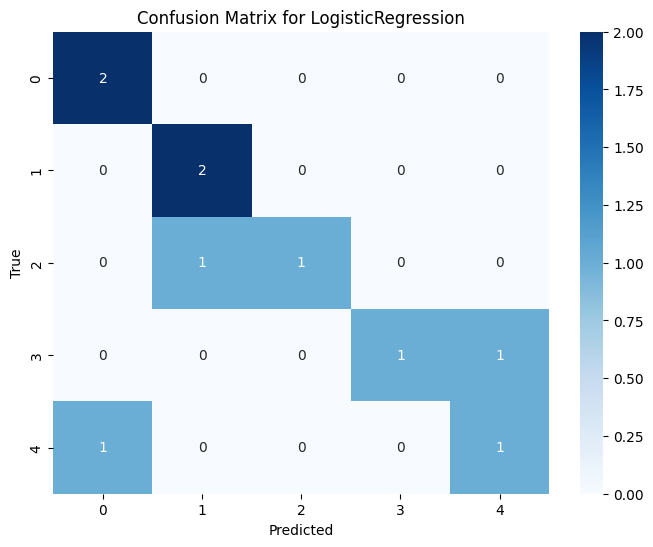

Training XGBoost model....


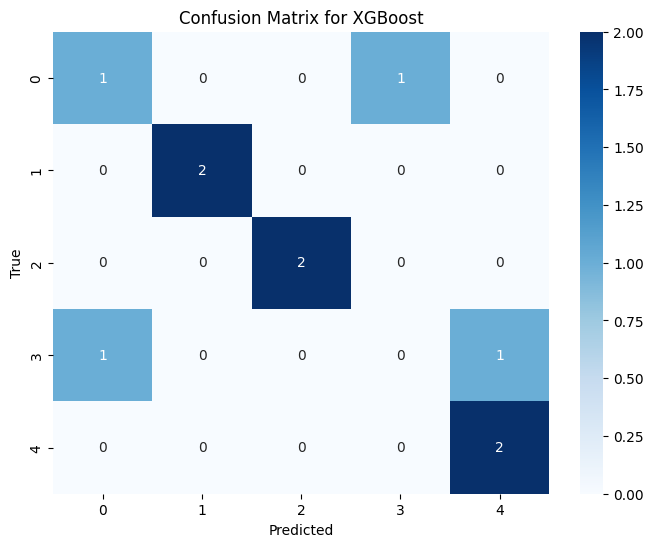

                     cv_time  cv_mean    cv_std  fit_time  predict_time_train  \
LogisticRegression  0.043261      0.6  0.122474  0.009359                 0.0   
XGBoost             0.262341      0.5  0.111803  0.057279                 0.0   

                    predict_time_test  train_accuracy  test_accuracy  
LogisticRegression                0.0           0.825            0.7  
XGBoost                           0.0           1.000            0.7  
                        0      1      2      3     4
LogisticRegression  0.500  0.500  0.750  0.500  0.75
XGBoost             0.625  0.375  0.625  0.375  0.50


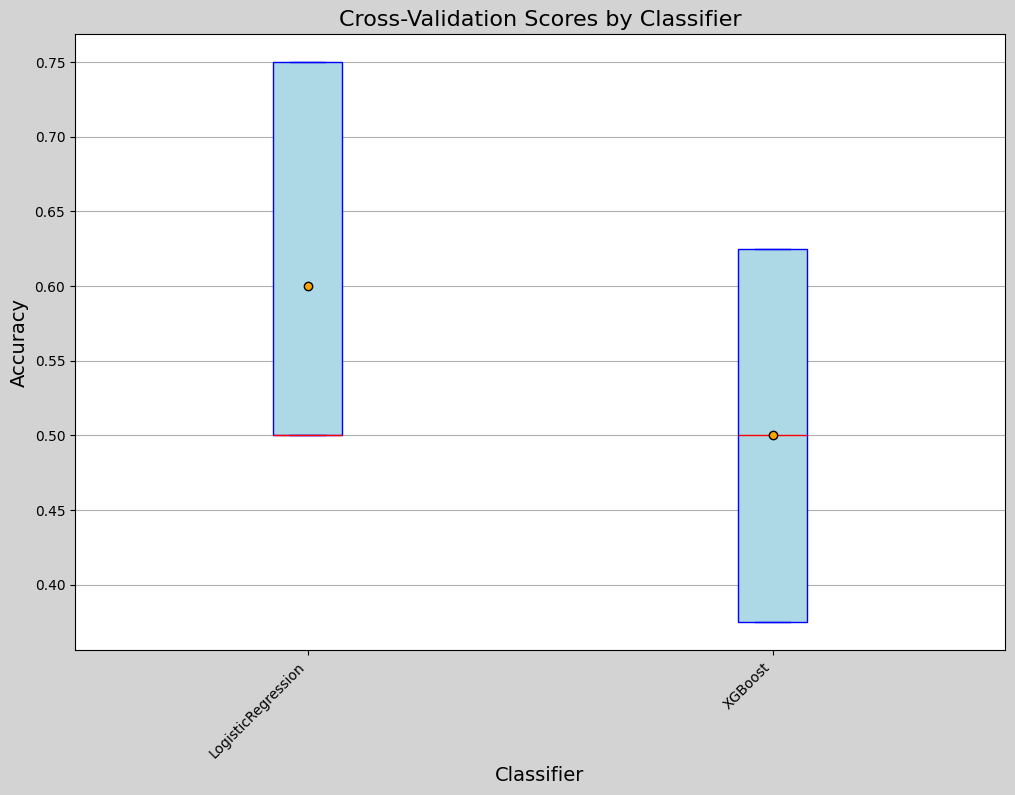

In [66]:
if X_train_user_specified is not None and X_test_user_specified is not None:
    results = model_trainer(
        classifiers_1,
        X_train_user_specified,
        y_train,
        X_test_user_specified,
        y_test
    )